In [18]:
#rasterio imports
import rasterio
import rasterio.features
import rasterio.warp
from rasterio.plot import show

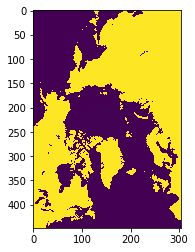

In [45]:
src = rasterio.open('N_yearly_sea_ice/geotiffs/N_201908_extent_v3.0.tif')

show(src.read())

In [25]:
src.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 304,
 'height': 448,
 'count': 1,
 'crs': CRS.from_epsg(3413),
 'transform': Affine(25000.0, 0.0, -3850000.0,
        0.0, -25000.0, 5850000.0)}

In [31]:
src.read_masks(1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
import numpy

def normalize(x, lower, upper):
    """Normalize an array to a given bound interval"""

    x_max = numpy.max(x)
    x_min = numpy.min(x)

    m = (upper - lower) / (x_max - x_min)
    x_norm = (m * (x - x_min)) + lower

    return x_norm

# Normalize each band separately
data_norm = numpy.array([normalize(data[i,:,:], 0, 255) for i in range(data.shape[0])])
data_rgb = data_norm.astype("uint8")

In [32]:
array = src.read()
array.shape

(1, 448, 304)

In [12]:
array = src.read(1)
array.shape

(448, 304)

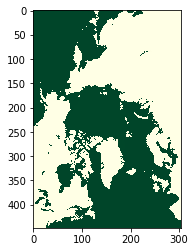

In [16]:
from matplotlib import pyplot
pyplot.imshow(array, cmap='YlGn_r')

pyplot.show()  

In [9]:
src.colorinterp

(<ColorInterp.palette: 2>,)

In [ ]:
#documentation help: https://rasterio.readthedocs.io/en/latest/

#loop through all tifs from 1979-2014
for x in range (1979, 2015):
    try:
        with rasterio.open(f'N_yearly_sea_ice/N_{x}08_extent_v3.0.tif') as dataset:

            # Read the dataset's valid data mask as a ndarray.
            mask = dataset.dataset_mask()

            # Extract feature shapes and values from the array.
            for geom, val in rasterio.features.shapes(
                    mask, transform=dataset.transform):

                # Transform shapes from the dataset's own coordinate
                # reference system to CRS84 (EPSG:4326).
                geom = rasterio.warp.transform_geom(
                    dataset.crs, 'EPSG:4326', geom, precision=6)

                # Print GeoJSON shapes to stdout.
                print(geom)
                
    except:
        pass



In [35]:
with rasterio.open(f'N_yearly_sea_ice/geotiffs/N_197908_extent_v3.0.tif') as dataset:

        # Read the dataset's valid data mask as a ndarray.
        mask = dataset.dataset_mask()

        # Extract feature shapes and values from the array.
        for geom, val in rasterio.features.shapes(mask, transform=dataset.transform):

            # Transform shapes from the dataset's own coordinate
            # reference system to CRS84 (EPSG:4326).
            geom = rasterio.warp.transform_geom(
                dataset.crs, 'EPSG:3995', geom, precision=6)

            # Print GeoJSON shapes to stdout.
            print(geom)

{'type': 'Polygon', 'coordinates': [[[1418458.022842, 6879521.410786], [-6524906.905075, -1063843.517132], [-1134766.418274, -6453984.003933], [6808598.509644, 1489380.923985], [1418458.022842, 6879521.410786]]]}


In [40]:
with rasterio.open(f'N_yearly_sea_ice/geotiffs/N_201808_extent_v3.0.tif') as dataset:

        # Read the dataset's valid data mask as a ndarray.
        mask = dataset.dataset_mask()

        # Extract feature shapes and values from the array.
        for geom, val in rasterio.features.shapes(mask, transform=dataset.transform):

            # Transform shapes from the dataset's own coordinate
            # reference system to CRS84 (EPSG:4326).
            geom = rasterio.warp.transform_geom(
                dataset.crs, 'EPSG:3995', geom, precision=6)

            # Print GeoJSON shapes to stdout.
            print(geom)

{'type': 'Polygon', 'coordinates': [[[1418458.022842, 6879521.410786], [-6524906.905075, -1063843.517132], [-1134766.418274, -6453984.003933], [6808598.509644, 1489380.923985], [1418458.022842, 6879521.410786]]]}
